In [1]:
import numpy as np 
import scipy.spatial.distance as d
import matplotlib.pyplot as plt
import time

In [2]:
# 2D container parameters
limit_x = 120
limit_y = 120

#Number and radius of particles
number_of_particles = 100
radius = 1

def force_init(n):
   	x_range = np.arange(radius, limit_x, 2*radius)
   	y_range = np.arange(radius, limit_y, 2*radius)
   	i = 0
   	positions = []
   	while i<n:
   		for y in y_range:
   			for x in x_range:
   				positions.append([x,y])
   				i+=1
   				
   	positions = positions[:n]
   	return np.array(positions,dtype=float)

position = force_init(number_of_particles)
print (position.shape)
velocity = np.random.randn(number_of_particles, 2)
print (velocity.shape)

l=0

start = time.time()
gravity = 9.8/100.0

(100, 2)
(100, 2)


In [3]:
# Updating
#>1.5 for with gravity, >0.3  + l<25 for w/o gravity
 
while np.amax(abs(velocity)) > 1.5 and l<50:
	# position += 10* vel for gravity case as well.
	position += 10*velocity # Nice large speed - dies down quickly enough!
	velocity*=0.9
	# Only toggle the below velocity changes in case of gravity 
	velocity[:,1] -= gravity

	pair_dist = d.cdist(position, position)
	pair_d = np.triu(pair_dist<=2*radius, k=1) # k=1 to exclude the diagonal
	for i, j in zip(*np.nonzero(pair_d)):
		# If two particles are too close then swap velocities
		# It's a bad hack but it'll work for now.
		vel_1 = velocity[j][:]*1.025
		velocity[j] = velocity[i][:]*1.025
		velocity[i] = vel_1
	

    # Masks for particles beyond the boundary
	xmax = position[:, 0] >= limit_x
	xmin = position[:, 0] <= 0
	ymax = position[:, 1] >= limit_y
	ymin = position[:, 1] <= 0

	# 10% energy loss
	velocity[xmax | xmin, 0] *= -0.9
	velocity[ymax | ymin, 1] *= -0.9

	# Force maximum positions
	position[xmax, 0] = limit_x - 2*radius 
	position[ymax, 1] = limit_y - 2*radius 
	position[xmin, 0] = 2*radius 
	position[ymin, 1] = 2*radius 

	position[xmax|xmin|ymax|ymin] += 10*velocity[xmax|xmin|ymax|ymin]
	
	print (np.amax(abs(velocity)))
	l +=1
	

end = time.time()
print (end- start)

2.725682743918352
2.5144423312646795
2.319573050591667
2.0876157455325
1.6909687538813252
1.5218718784931926
1.3696846906438733
0.021612167358398438


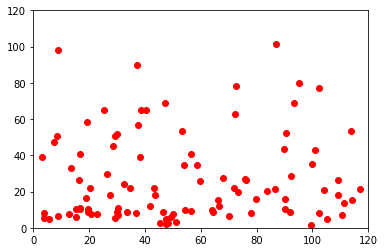

In [4]:
if l%1 ==0:
	x = []
	y = []
	for item in position:
		x.append(item[0])
		y.append(item[1]) 
	plt.plot(x,y, 'ro')
	plt.ylim([0,limit_y])
	plt.xlim([0,limit_x])
	plt.show()

In [5]:
def qsort(a, i):
       return sorted(a, key = lambda arr: arr[i])

def search(a, pos, value_start, value_end):
	if len(a)<1:
		return []

	empty = []
	i = 0
	for x in a:
		if x[pos] < value_end and x[pos]>=value_start:
			empty.append(x)
			i+=1
		elif x[pos]<value_start:
			i+=1
		else:
			return empty
	return empty

def density(arr, depth, width, points_d, points_w ):
	# arr is a depth sorted array
	# depth, width are the image dimension
	# points_d, points_w are the number of points across depth and width.
	density = []
	depths = np.linspace(0, depth, points_d, endpoint = True)
	depths = depths.astype(int)
	widths = np.linspace(0, width, points_w,  endpoint = True)
	widths = widths.astype(int)

	for i in range(len(depths)-1):
		a = search(arr, 0, depths[i], depths[i+1])
		b = qsort(a,1)
		
		for j in range(len(widths)-1):
			c = search(b, 1, widths[j], widths[j+1])
			density.append(len(c))
	return density

def hist(array, block, title, xlab, ylab):
	hist, bins = np.histogram(array, bins=block)
	width = 0.7 * (bins[1] - bins[0])
	center = (bins[:-1] + bins[1:]) / 2
	plt.bar(center, hist, align='center', width=width)
	plt.title(title)
	plt.xlabel(xlab)
	plt.ylabel(ylab)
	plt.show()
	return plt.bar(center, hist, align='center', width=width)

In [6]:
depth_sort = qsort(position, 0) 
den = density(depth_sort, limit_x, limit_y, 10, 10)
print (den)
den1 = []

for item in den:
	if item>5:
		den1.append(item)


[5, 0, 1, 2, 0, 0, 0, 1, 0, 8, 2, 2, 1, 2, 0, 0, 0, 0, 6, 3, 2, 3, 2, 0, 1, 0, 0, 9, 2, 0, 0, 1, 1, 0, 0, 0, 4, 1, 2, 1, 1, 0, 0, 0, 0, 3, 4, 3, 0, 1, 1, 0, 0, 0, 2, 3, 1, 2, 0, 0, 0, 1, 0, 3, 1, 1, 1, 0, 2, 1, 0, 0, 1, 4, 1, 0, 1, 0, 0, 0, 0]


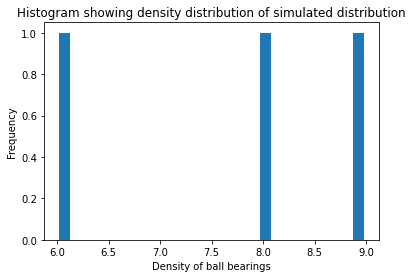

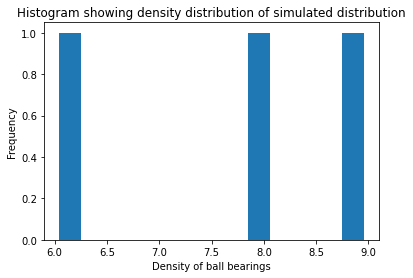

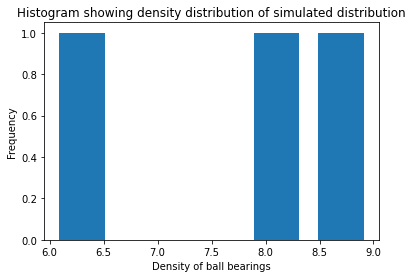

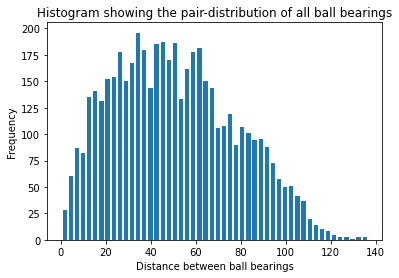

<BarContainer object of 50 artists>

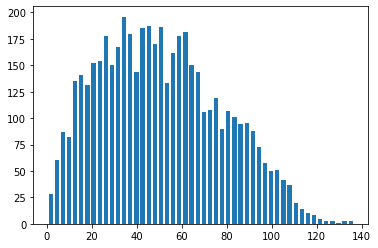

In [7]:
# Don't know which histogram will work best

hist(den1, 20, 'Histogram showing density distribution of simulated distribution', 'Density of ball bearings', 'Frequency')
plt.close()
hist(den1, 10, 'Histogram showing density distribution of simulated distribution', 'Density of ball bearings', 'Frequency')
plt.close()
hist(den1, 5, 'Histogram showing density distribution of simulated distribution', 'Density of ball bearings', 'Frequency')
plt.close()
c = d.pdist(position)
hist(c, 50, 'Histogram showing the pair-distribution of all ball bearings', 'Distance between ball bearings', 'Frequency') # Histogram representation for average pixel density
